In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import style
style.use("ggplot")
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import lazypredict



# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
#file_path = Path("../Resources/metro_2br.csv")
#metro_df = pd.read_csv(file_path)
#metro_df.drop(columns='indicator_id', inplace=True)
#metro_df.head()


#metro_df.set_index(pd.to_datetime(metro_df['date']), inplace=True)
#metro_df.drop('date', axis=1, inplace=True)
#metro_df.head()

### Austin Condo Regression

In [36]:
file_path = Path("../Resources/aus_condo.csv")
metro_df = pd.read_csv(file_path)
metro_df = metro_df.drop('indicator_id',axis=1)
metro_df = metro_df.drop('region_id',axis=1)
metro_df = metro_df.sort_values('date')
metro_df['date'] = pd.to_datetime(metro_df['date'])
metro_df = metro_df.set_index('date')
metro_df = metro_df.dropna()
metro_df.head()

,value,region,change,lagged_change
date,,,,
1996-01-31,153184.0,"Austin, TX",-57.685731,-3.500752
1996-02-29,152411.0,"Austin, TX",-0.504622,-57.685731
1996-03-31,151035.0,"Austin, TX",-0.902822,-0.504622
1996-04-30,149075.0,"Austin, TX",-1.297712,-0.902822
1996-05-31,147382.0,"Austin, TX",-1.135670,-1.297712


<AxesSubplot:xlabel='date'>

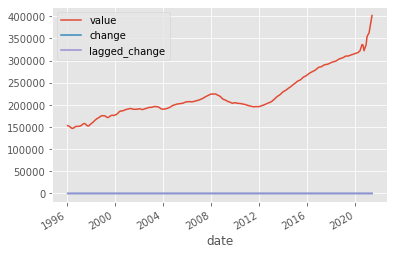

In [37]:
metro_df.plot()

In [38]:
#Build Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [39]:
# Separate the data into the X and y components
# In this case, y will be the `value` and X will be the remainign columns

#X = metro_df.drop(columns='value', axis=1)
X = metro_df.lagged_change.to_frame()
y = metro_df.change.values

In [40]:
# Fit the model to the data

model.fit(X, y)

LinearRegression()

In [41]:
predicted_y_values = model.predict(X)
predicted_y_values

array([-2.42153416e-01, -5.39733684e+00,  4.28997276e-02,  5.01479196e-03,
       -3.25552663e-02, -1.71384710e-02,  5.99884869e-02,  1.51917494e-01,
        2.02495156e-01,  1.97067240e-01,  1.14121114e-01,  7.39042922e-02,
        1.04865241e-01,  1.15139213e-01,  1.44567610e-01,  1.75023228e-01,
        2.07858837e-01,  1.95038232e-01,  9.93524062e-02, -2.66121239e-03,
       -5.05061035e-02, -1.57023749e-02,  1.10274852e-01,  2.15405451e-01,
        2.18720300e-01,  2.11014742e-01,  1.72400048e-01,  2.40674902e-01,
        2.12306796e-01,  2.01645641e-01,  1.95858287e-01,  1.68437434e-01,
        1.71173806e-01,  1.67167445e-01,  1.91649550e-01,  1.57147673e-01,
        8.80379022e-02,  8.52727896e-02,  8.64083414e-02,  2.95430981e-02,
       -1.47078784e-02,  4.91603418e-02,  1.22747968e-01,  1.94508893e-01,
        1.77752490e-01,  1.39303359e-01,  9.89973810e-02,  6.49432843e-02,
        1.19378027e-01,  1.39059156e-01,  1.66628499e-01,  1.84106452e-01,
        2.25268476e-01,  

In [42]:
#Extracting coef, intercept

model.coef_
model.intercept_


0.09090968237738174

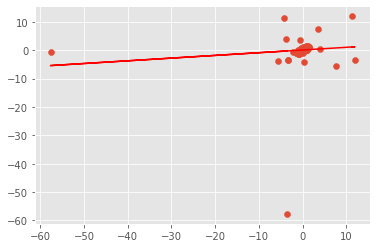

In [43]:
#Plotting Results

plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')

In [44]:
#Metrics - score, R2, mse, rmse, std

from sklearn.metrics import mean_squared_error, r2_score

score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [45]:
# Print the score, r2, mse, rmse, and standard deviation
print(f"Score: {score}")
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation: {np.std(y)}")

Score: 0.009064431085482383
R-squared (R2 ): 0.009064431085482383
Mean Squared Error (MSE): 12.667842000360327
Root Mean Squared Error (RMSE): 3.559191200309465
Standard Deviation: 3.575432720879381


In [46]:
#Build Logistic Regression

#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [47]:
#Create Model
#classifier = LogisticRegression(solver='lbfgs', warm_start=True, random_state=78)
#classifier

In [48]:
# Train the data
#classifier.fit(X_train, y_train)

In [49]:
# Score the model
#print(f"Training Data Score: {classifier.score(X_train, y_train)}")
#print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [50]:
# Predict outcomes for test data set
#predictions = classifier.predict(X_test)
#pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [51]:
#Confusion Matrix
#from sklearn.metrics import confusion matrix
#confusion_matrix(y_test, predictions)

In [52]:
#Classification Report
#from sklearn.metrics import classsification report
#print(classification_report(y_test, predictions))

In [53]:
#Build LSTM Model

def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [54]:
# Predict Closing Prices using a 10 day window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 5

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 3
target_column = 2
X, y = window_data(metro_df, window_size, feature_column, target_column)

In [55]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.8 * len(X))

X_train = X[: split]
X_test = X[split:]
y_train = y [: split]
y_test = y[split:]

In [56]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)


In [57]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [59]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

model = Sequential()

number_units = 25
dropout_fraction = 0.2


# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [60]:
# Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")

In [61]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5, 25)             2700      
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 25)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 5, 25)             5100      
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 25)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 25)                5100      
_________________________________________________________________
dropout_5 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [62]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
237/237 [==============================] - ETA: 0s - loss: 0.009 - 4s 3ms/step - loss: 0.0090
Epoch 2/10
237/237 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 3/10
237/237 [==============================] - 1s 3ms/step - loss: 0.0025
Epoch 4/10
237/237 [==============================] - 1s 3ms/step - loss: 0.0022
Epoch 5/10
237/237 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 6/10
237/237 [==============================] - 1s 3ms/step - loss: 0.0019
Epoch 7/10
237/237 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 8/10
237/237 [==============================] - ETA: 0s - loss: 0.001 - 1s 3ms/step - loss: 0.0016
Epoch 9/10
237/237 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 10/10
237/237 [==============================] - 1s 3ms/step - loss: 0.0013


In [63]:
# Evaluate the model
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 3ms/step - loss: 0.0184


0.018427303060889244

In [64]:
# Make some predictions
predicted = model.predict(X_test)

In [65]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [66]:
# Create a DataFrame of Real and Predicted values
housing = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = metro_df.index[-len(real_prices): ]) 

housing.head()

,Real,Predicted
date,,
2016-04-30,0.506651,0.485114
2016-05-31,0.487563,0.485798
2016-06-30,0.451925,0.485828
2016-07-31,0.373090,0.485482
2016-08-31,0.433714,0.485080


<AxesSubplot:xlabel='date'>

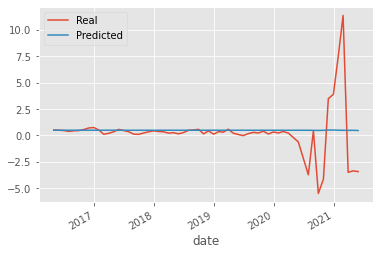

In [67]:
# Plot the real vs predicted values as a line chart
housing.plot()

In [68]:
#Lazy Predict - Regression

#from lazypredict.Supervised import LazyClassifier
#from sklearn.datasets import load_breast_cancer
#from sklearn.model_selection import train_test_split

#data = load_breast_cancer()
#X = data.data
#y= data.target

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)

#print(models)